September 5, 2024

CASMA665 Integrate Fire Neuron

Independent work

Going through module:
https://mark-kramer.github.io/BU-MA665-MA666/IF.html


### INF Model

dV/dt = I/c
--> derive numerical solution:
V(t+1) = V(t) + dt*(I/C)

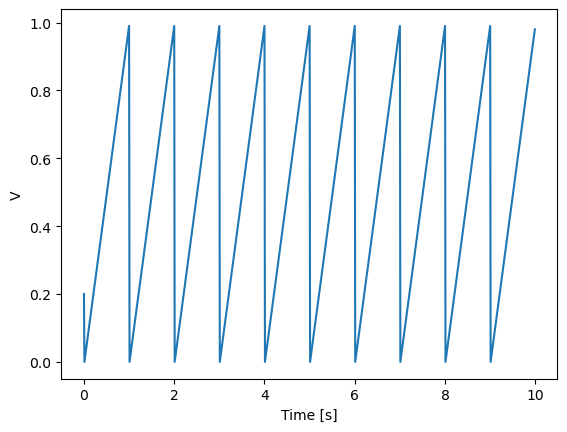

In [65]:
import numpy as np
import matplotlib.pyplot as plt

C=1.0                   # capcitance created by membrane which acts as an insulator
I=1.0                   # current
dt=0.01                 # (s) time step
Vth=1                   # threshold voltage
Vreset=0                # reset voltage
V = np.zeros([1000,1])  # initialize voltage array; 1000 rows, 1 col
V[0]=0.2  # initial val of V

for i in range(1,999):
    V[i+1] = V[i] + dt*(I/C)
    if V[i+1]>Vth:      # reset voltage if above threshold
        V[i+1]=Vreset
# print(V)

t = np.arange(0, len(V))*dt  # arr of times

plt.figure()
plt.plot(t,V)
plt.xlabel('Time [s]')
plt.ylabel('V')
plt.show()


### LIF Model

Leaky integrate-fire model



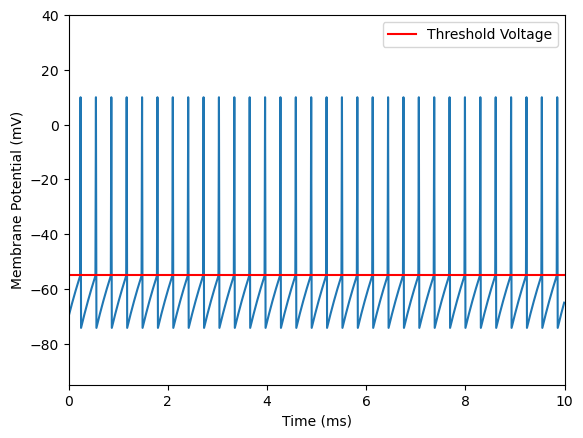

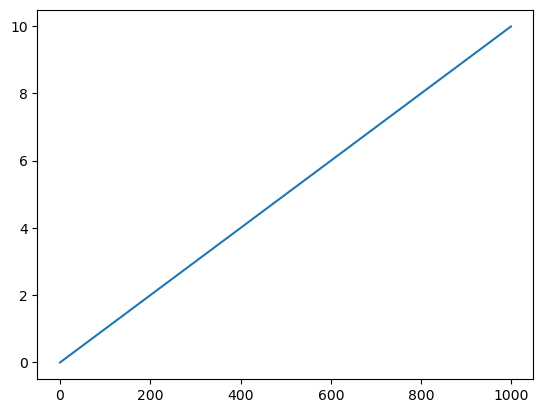

In [118]:
import numpy as np
import matplotlib.pyplot as plt

"""
Descr: Modeling a leaky integrate-fire model neuron.

Args:
v --- 
t --- 

Returns:
"""
def f(V, t) : return (I - V) / tau

# Define constants
I = 1                 # injected current
tau = 1               # time constant
V = -70               # initial condition (mV)
Vrest = -70           # resting potential (mV)
Vth = -55             # threshold voltage (mV)
Vap = 10              # action potential voltage (mv)
refrac = 5            # length of refractory period (ms)
dt = 0.01             # integration timestep size (ms)
t_sim = 10            # length time of simulation (10ms)
v_values = []         # initialize voltage array

# Create an array of times. Represents Time (ms) on x-axis
# Note: When plotting, v_values.size == time_values.size
time_values = np.arange(0, stimulus_time, dt)

for t in time_values:
  if V >= Vth:             # if voltage >= threshold voltage, then spike and reset voltage
    v_values.append(Vap)   # spike
    V = -75                # reset
  else:                    # otherwise, append voltage to voltage array
    v_values.append(V)
  V = V + dt*f(V, t)       # increment voltage by calling LIF function

# Plot 
plt.plot(time_values, v_values)
plt.xlabel("Time (ms)")
plt.ylabel("Membrane Potential (mV)")
plt.axhline(y = v_threshold, color = 'r', linestyle = '-', label='Threshold Voltage') # threshold voltage
legend = plt.legend(loc='upper right')
plt.xlim(0, stimulus_time)
plt.ylim(v_rest + (-20), v_AP + 20)
plt.show()
